In [1]:
import datetime
import pandas as pd
import numpy as np

dti = pd.to_datetime(['1/1/2018', np.datetime64('2018-01-01'),datetime.datetime(2018, 1, 1)])
dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [2]:
dti = pd.date_range('2018-01-01', periods=3, freq='H')
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [3]:
dti = dti.tz_localize('UTC')
dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [4]:
idx = pd.date_range('2018-01-01', periods=5, freq='H')
ts = pd.Series(range(len(idx)), index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [5]:
pd.Series(pd.date_range('2000', freq='D', periods=3))

0   2000-01-01
1   2000-01-02
2   2000-01-03
dtype: datetime64[ns]

In [6]:
pd.Series(pd.period_range('1/1/2011', freq='M', periods=3))

0    2011-01
1    2011-02
2    2011-03
dtype: period[M]

In [7]:
pd.Series(pd.date_range('1/1/2011', freq='M', periods=3))

0   2011-01-31
1   2011-02-28
2   2011-03-31
dtype: datetime64[ns]

# Timestamps vs. Time Spans

In [8]:
import docx2txt
my_text = docx2txt.process("Chatbot.docx")

In [9]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#split dataset in features and target variable
feature_cols = df.columns[:8]
X = df[feature_cols] # Features
y = df['Outcome'] # Target variable

In [12]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

#
y_pred=model.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[119,  11],
       [ 26,  36]])

# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

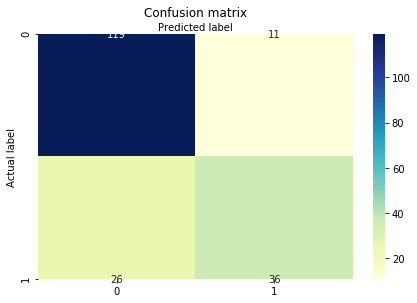

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


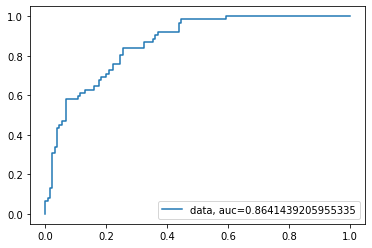

In [16]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# german-credit-data

In [17]:
df_credit = pd.read_csv("german_credit_data.csv")
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [18]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [19]:
print(df_credit.nunique())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


In [20]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

categories = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=categories)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']


print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))
df_bad.head()

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult
9,9,28,male,3,own,little,moderate,5234,30,car,bad,Young
10,10,25,female,2,rent,little,moderate,1295,12,car,bad,Student
11,11,24,female,2,rent,little,little,4308,48,business,bad,Student


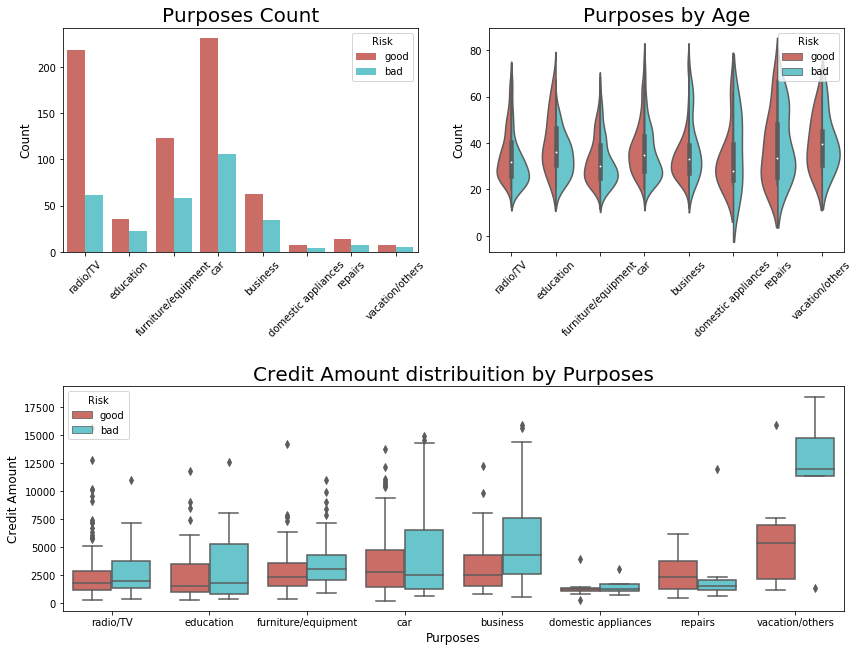

In [21]:
plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

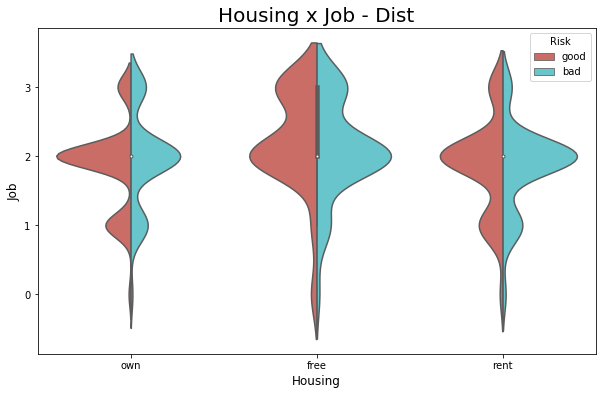

In [22]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [23]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [24]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [25]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [26]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


In [27]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


# Feature Engineering

In [28]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [29]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [30]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# Correlation

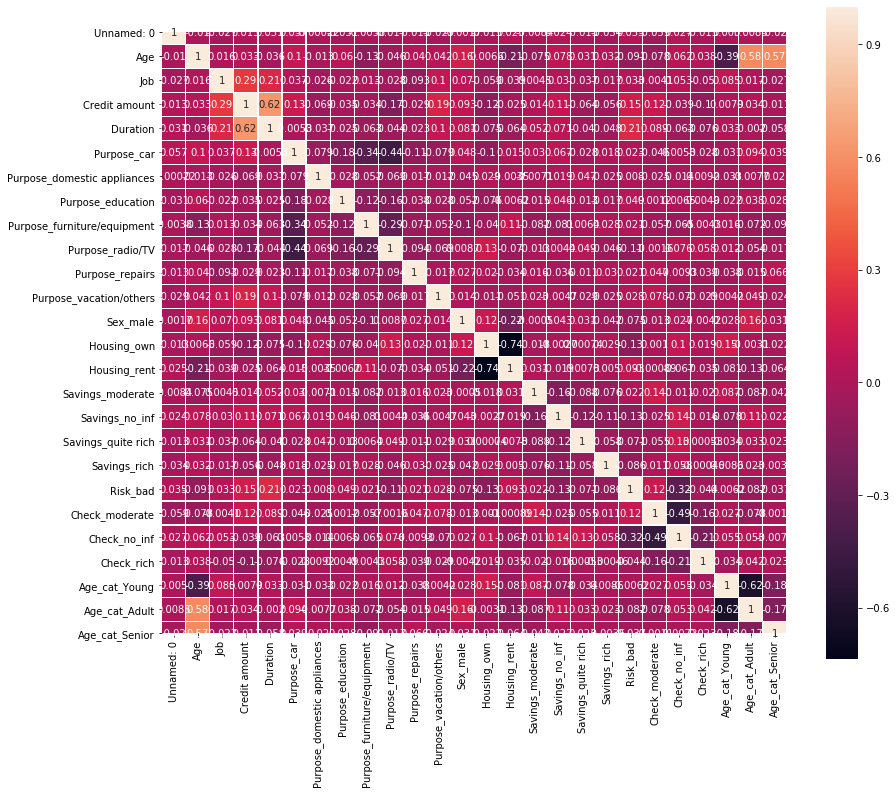

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# Preprocessing

In [33]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [34]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

LR: 0.387574 (0.077970)
LDA: 0.418790 (0.082453)
KNN: 0.240532 (0.098844)
CART: 0.522537 (0.104023)
NB: 0.591679 (0.071111)


/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anit/anaconda3/lib/python3.7/site-packages/skl

RF: 0.349076 (0.089907)
SVM: 0.008711 (0.017889)
XGB: 0.382318 (0.102934)


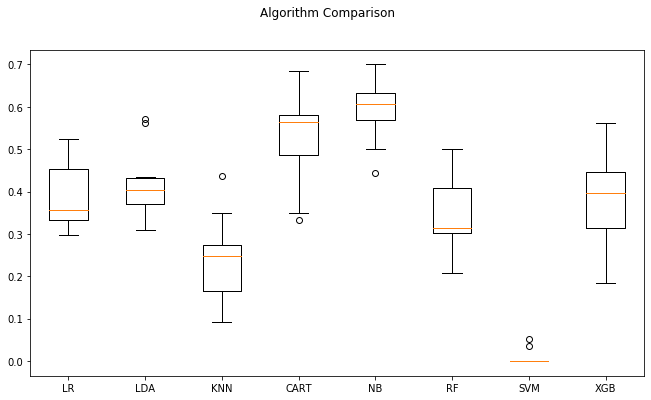

In [35]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Model 1 (RandomForestClassifier)

In [36]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.109, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.152, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.133, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.133, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.044, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.022, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.087, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.109, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.067, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=50 ....................
[CV]  max_depth=3, max_features=4, n_estimators=50, score=0.022, total=   0.1s
[CV] max_depth=3, max

[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.111, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.152, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.304, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.217, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.222, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=50 ...................
[CV]  max_depth=3, max_features=15, n_estimators=50, score=0.156, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=150 ..................
[CV]  max_depth=3, max_features=15, n_estimators=150, score=0.174, total=   0.2s
[CV] max_dept

[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.196, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.111, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.222, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=0.087, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=0.239, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=0.196, total=   0.1s
[CV] max_depth=5, max_features=4, n_estimators=50 ....................
[CV]  max_depth=5, max_features=4, n_estimators=50, score=0.111, total=   0.1s
[CV] max_depth=5, max

[CV]  max_depth=5, max_features=15, n_estimators=25, score=0.422, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=50 ...................
[CV]  max_depth=5, max_features=15, n_estimators=50, score=0.261, total=   0.1s
[CV] max_depth=5, max_features=15, n_estimators=50 ...................
[CV]  max_depth=5, max_features=15, n_estimators=50, score=0.413, total=   0.1s
[CV] max_depth=5, max_features=15, n_estimators=50 ...................
[CV]  max_depth=5, max_features=15, n_estimators=50, score=0.304, total=   0.1s
[CV] max_depth=5, max_features=15, n_estimators=50 ...................
[CV]  max_depth=5, max_features=15, n_estimators=50, score=0.289, total=   0.1s
[CV] max_depth=5, max_features=15, n_estimators=50 ...................
[CV]  max_depth=5, max_features=15, n_estimators=50, score=0.356, total=   0.1s
[CV] max_depth=5, max_features=15, n_estimators=150 ..................
[CV]  max_depth=5, max_features=15, n_estimators=150, score=0.217, total=   0.2s
[CV] max_dept

[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.289, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.244, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.174, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.326, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.283, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.200, total=   0.1s
[CV] max_depth=7, max_features=4, n_estimators=50 ....................
[CV]  max_depth=7, max_features=4, n_estimators=50, score=0.200, total=   0.0s
[CV] max_depth=7, max

[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.413, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.422, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=25 ...................
[CV]  max_depth=7, max_features=15, n_estimators=25, score=0.467, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.348, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.435, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.435, total=   0.1s
[CV] max_depth=7, max_features=15, n_estimators=50 ...................
[CV]  max_depth=7, max_features=15, n_estimators=50, score=0.378, total=   0.1s
[CV] max_depth

[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.356, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=25 ...................
[CV]  max_depth=10, max_features=4, n_estimators=25, score=0.333, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.239, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.348, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.457, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.311, total=   0.1s
[CV] max_depth=10, max_features=4, n_estimators=50 ...................
[CV]  max_depth=10, max_features=4, n_estimators=50, score=0.311, total=   0.1s
[CV] max_depth

[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.478, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.435, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.356, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=25 ..................
[CV]  max_depth=10, max_features=15, n_estimators=25, score=0.489, total=   0.0s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.348, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.457, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.478, total=   0.1s
[CV] ma

[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.435, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.378, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.400, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.304, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.348, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.413, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.356, total=   0.1s


[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.457, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.370, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.378, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.489, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.348, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.457, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.435, total= 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   29.7s finished
/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [38]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.744


[[159  19]
 [ 45  27]]


0.40419161676646703


# Model 2 (GaussianNB)

In [39]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [40]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [41]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Training score data: 
0.704
0.644


[[124  54]
 [ 35  37]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.51      0.45        72

    accuracy                           0.64       250
   macro avg       0.59      0.61      0.59       250
weighted avg       0.67      0.64      0.65       250



# Verify the ROC curve

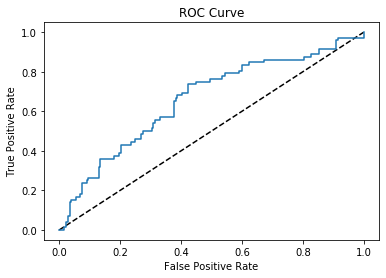

In [42]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [44]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7026666666666667


In [45]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.708


[[148  30]
 [ 43  29]]


0.4178674351585015


# Implementing a pipeline of models

In [46]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

/home/anit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 

# Increase the accuracy of the models

In [47]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.3,
 'max_depth': 5,
 'min_child_weight': 3,
 'subsample': 0.85}

In [48]:
y_pred = grid_search.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.76


[[160  18]
 [ 42  30]]
